In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings 

In [3]:
df = pd.read_csv('Sub_Division_IMD_2017.csv')
df.head()

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JF,MAM,JJAS,OND
0,Andaman & Nicobar Islands,1901,49.2,87.1,29.2,2.3,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,Andaman & Nicobar Islands,1902,0.0,159.8,12.2,0.0,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,Andaman & Nicobar Islands,1903,12.7,144.0,0.0,1.0,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,Andaman & Nicobar Islands,1904,9.4,14.7,0.0,202.4,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,Andaman & Nicobar Islands,1905,1.3,0.0,3.3,26.9,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8


In [5]:
df.isnull().sum()

SUBDIVISION     0
YEAR            0
JAN             4
FEB             3
MAR             6
APR             4
MAY             3
JUN             5
JUL             7
AUG             4
SEP             6
OCT             7
NOV            11
DEC            10
ANNUAL         26
JF              6
MAM             9
JJAS           10
OND            13
dtype: int64

In [7]:
df.fillna(df.median(numeric_only=True),inplace=True)

In [9]:
df.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
JF             0
MAM            0
JJAS           0
OND            0
dtype: int64

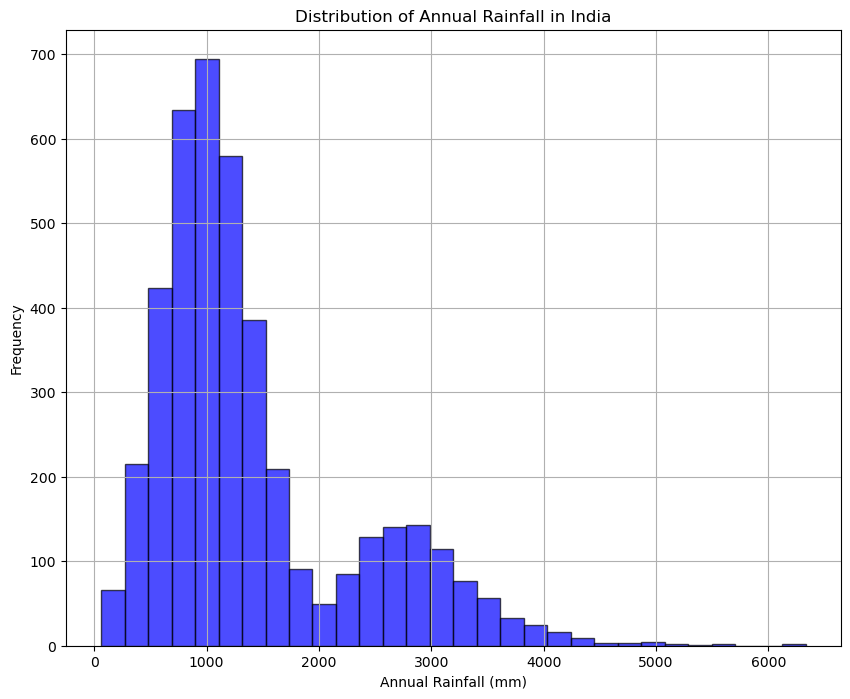

In [11]:
#to define the threhold for classification we need to find low, high , medium .
plt.figure(figsize=(10,8))
plt.hist(df['ANNUAL'],bins=30 , color='blue',alpha=0.7, edgecolor='black')
plt.xlabel("Annual Rainfall (mm)")
plt.ylabel("Frequency")
plt.title("Distribution of Annual Rainfall in India")
plt.grid(True)
plt.show()

The histogram shows the distribution of annual rainfall across different regions and years. Now, let's define thresholds for classification:

Low Rainfall: Below the 33rd percentile (low end of the distribution)
Medium Rainfall: Between the 33rd and 66th percentile
High Rainfall: Above the 66th percentile

In [18]:
# Calculate percentiles for classification
low_threshold = df["ANNUAL"].quantile(0.33)
high_threshold = df["ANNUAL"].quantile(0.66)

In [20]:
low_threshold , high_threshold

(909.113, 1385.984)

Based on the dataset distribution, we can classify annual rainfall as follows:

Low Rainfall: < 907 mm
Medium Rainfall: 907 - 1393 mm
High Rainfall: > 1393 mm

In [24]:
#making a new column for low , medium , high 
def classify_rainfall(value):
    if value < low_threshold:
        return 'Low'
    elif value <= high_threshold:
        return 'Medium'
    else:
        return 'High'


In [26]:
df['Rainfall_cat'] = df['ANNUAL'].apply(classify_rainfall)

In [28]:
df['Rainfall_cat'].value_counts()

Rainfall_cat
High      1424
Medium    1382
Low       1382
Name: count, dtype: int64

In [30]:
X = df.drop(columns=['ANNUAL','Rainfall_cat'])

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [38]:
le_subdivision = LabelEncoder()
X["SUBDIVISION"] = le_subdivision.fit_transform(X["SUBDIVISION"])

# Target variable encoding
le_category = LabelEncoder()
y = le_category.fit_transform(df["Rainfall_cat"])  # Low: 0, Medium: 1, High: 2

In [52]:
X_train , X_test ,y_train,y_test = train_test_split(X,y,test_size=0.2 , stratify=y)

In [54]:
X_train.shape , X_test.shape , y_train.shape , y_test.shape

((3350, 18), (838, 18), (3350,), (838,))

In [60]:
#Random Forest Model
rf = RandomForestClassifier(n_estimators = 150 )
rf.fit(X_train , y_train)

RandomForestClassifier(n_estimators=150)

In [64]:
y_pred = rf.predict(X_test)
y_pred

array([1, 0, 1, 1, 2, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 2, 0, 1, 2, 0, 2,
       0, 0, 1, 1, 0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 1,
       0, 1, 1, 1, 2, 2, 2, 0, 0, 0, 2, 1, 1, 2, 1, 0, 2, 1, 2, 0, 2, 1,
       2, 2, 2, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 1, 2, 2, 1, 0, 1,
       2, 1, 2, 1, 2, 1, 0, 1, 2, 0, 1, 0, 2, 2, 0, 2, 2, 2, 0, 1, 0, 1,
       2, 1, 1, 2, 2, 1, 0, 0, 2, 2, 1, 1, 0, 2, 1, 0, 0, 2, 1, 1, 1, 0,
       2, 2, 0, 0, 2, 2, 1, 1, 2, 2, 1, 1, 1, 0, 2, 1, 1, 0, 0, 2, 0, 1,
       1, 2, 0, 0, 0, 0, 1, 1, 2, 0, 2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 0, 2,
       1, 1, 0, 2, 1, 2, 0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2, 1, 1, 0, 2, 1,
       1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 2, 1, 2, 0, 2, 0, 0, 2, 0, 2, 0,
       0, 2, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 1, 0, 2, 2, 0, 1, 1, 2, 0, 2,
       0, 0, 1, 1, 0, 1, 1, 0, 2, 0, 1, 2, 2, 0, 0, 1, 1, 2, 0, 1, 0, 2,
       1, 2, 1, 0, 1, 2, 2, 2, 1, 2, 0, 1, 1, 0, 2, 0, 2, 1, 2, 2, 2, 1,
       2, 2, 1, 1, 2, 2, 1, 0, 2, 0, 1, 0, 1, 2, 1,

In [84]:
from sklearn.metrics import accuracy_score , classification_report,confusion_matrix,mean_absolute_error,r2_score , ConfusionMatrixDisplay
rf_acc = accuracy_score(y_test , y_pred)
rf_cr = classification_report(y_test,y_pred)
rf_confmat = confusion_matrix(y_test,y_pred)
rf_r2 = r2_score(y_test,y_pred)
rf_mae = mean_absolute_error(y_test,y_pred)

In [78]:
rf_acc , rf_confmat , rf_cr , rf_mae , rf_r2

(0.9522673031026253,
 array([[274,   0,  11],
        [  0, 267,   9],
        [  9,  11, 257]], dtype=int64),
 '              precision    recall  f1-score   support\n\n           0       0.97      0.96      0.96       285\n           1       0.96      0.97      0.96       276\n           2       0.93      0.93      0.93       277\n\n    accuracy                           0.95       838\n   macro avg       0.95      0.95      0.95       838\nweighted avg       0.95      0.95      0.95       838\n',
 0.07159904534606205,
 0.8220398732618095)

In [90]:
#SVM model
svm_model = SVC(kernel="rbf", random_state=42)
svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

In [94]:
svm_accuracy = accuracy_score(y_test, y_pred_svm)
svm_report = classification_report(y_test, y_pred_svm, target_names=le_category.classes_)

In [96]:
svm_accuracy, svm_report

(0.9606205250596659,
 '              precision    recall  f1-score   support\n\n        High       0.97      0.97      0.97       285\n         Low       0.98      0.96      0.97       276\n      Medium       0.93      0.95      0.94       277\n\n    accuracy                           0.96       838\n   macro avg       0.96      0.96      0.96       838\nweighted avg       0.96      0.96      0.96       838\n')

In [102]:
#Logistic regression model .
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)
y_pred_log = log_reg_model.predict(X_test)

C:\Users\Admin\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [106]:
log_reg_accuracy = accuracy_score(y_test, y_pred_log)
log_reg_report = classification_report(y_test, y_pred_log, target_names=le_category.classes_)

In [108]:
log_reg_accuracy, log_reg_report

(0.9737470167064439,
 '              precision    recall  f1-score   support\n\n        High       0.99      0.98      0.98       285\n         Low       0.98      0.98      0.98       276\n      Medium       0.95      0.97      0.96       277\n\n    accuracy                           0.97       838\n   macro avg       0.97      0.97      0.97       838\nweighted avg       0.97      0.97      0.97       838\n')

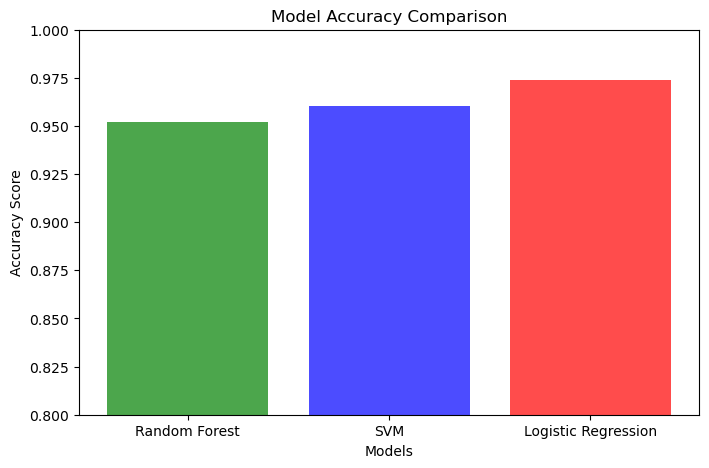

In [114]:
#Bar plot for accuracy comparsion 
import matplotlib.pyplot as plt
import numpy as np

# Model names and accuracy scores
models = ["Random Forest", "SVM", "Logistic Regression"]
accuracies = [rf_acc, svm_accuracy, log_reg_accuracy]

# Bar plot
plt.figure(figsize=(8, 5))
plt.bar(models, accuracies, color=['green', 'blue', 'red'] , alpha=0.7)
plt.ylim(0.8, 1.0)  # Adjust the y-axis range if needed
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Model Accuracy Comparison")
plt.show()


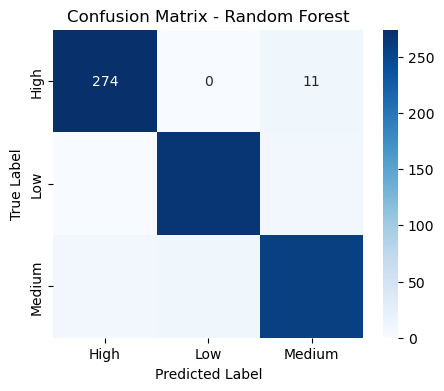

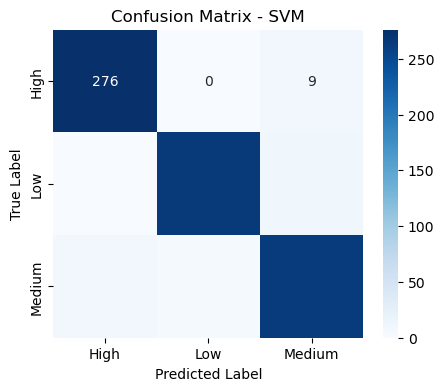

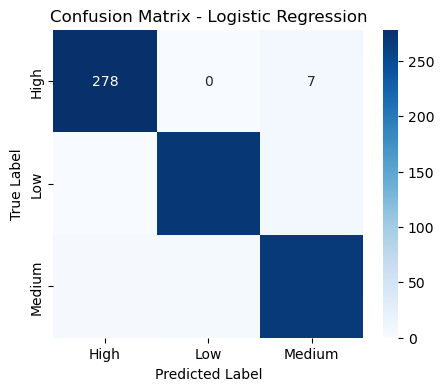

In [126]:
#Confusion matrix 
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=le_category.classes_, yticklabels=le_category.classes_)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

# Plot for each model
plot_confusion_matrix(y_test, y_pred, "Random Forest")
plot_confusion_matrix(y_test, y_pred_svm, "SVM")
plot_confusion_matrix(y_test, y_pred_log, "Logistic Regression")


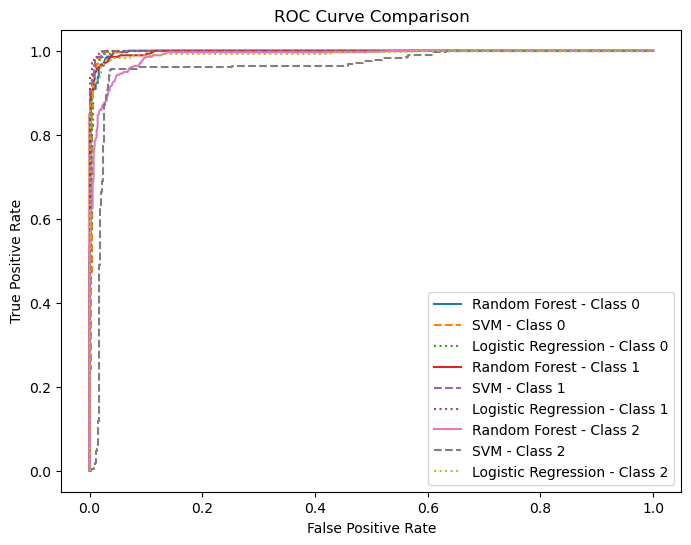

In [124]:
#ROC Curve
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels for multi-class ROC curve
y_test_bin = label_binarize(y_test, classes=[0, 1, 2])
y_score_rf = rf.predict_proba(X_test)
y_score_svm = svm_model.decision_function(X_test)
y_score_log = log_reg_model.predict_proba(X_test)

# Plot ROC curves
plt.figure(figsize=(8, 6))
for i in range(3):  # Three classes: Low, Medium, High
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_rf[:, i])
    plt.plot(fpr, tpr, label=f"Random Forest - Class {i}")
    
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_svm[:, i])
    plt.plot(fpr, tpr, linestyle='dashed', label=f"SVM - Class {i}")
    
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_score_log[:, i])
    plt.plot(fpr, tpr, linestyle='dotted', label=f"Logistic Regression - Class {i}")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
